In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#pip install matplotlib

In [ ]:
def histogram(data, bins,Range):
    # Find minimum and maximum values in the data
    min_val = Range[0]
    max_val = Range[1]

    # Calculate bin width
    bin_width = (max_val - min_val) / bins

    # Initialize histogram counts
    histogram_counts = [0] * bins

    # Count occurrences of data points in each bin
    for value in data:
        # Determine which bin the value belongs to
        bin_index = int((value - min_val) / bin_width)
        # Increment the count for that bin
        histogram_counts[bin_index] += 1

    return np.array(histogram_counts)

In [ ]:
def cumsum(arr):
    cumulative_sum = []
    total = 0
    for num in arr:
        total += num
        cumulative_sum.append(total)
    return np.array(cumulative_sum)

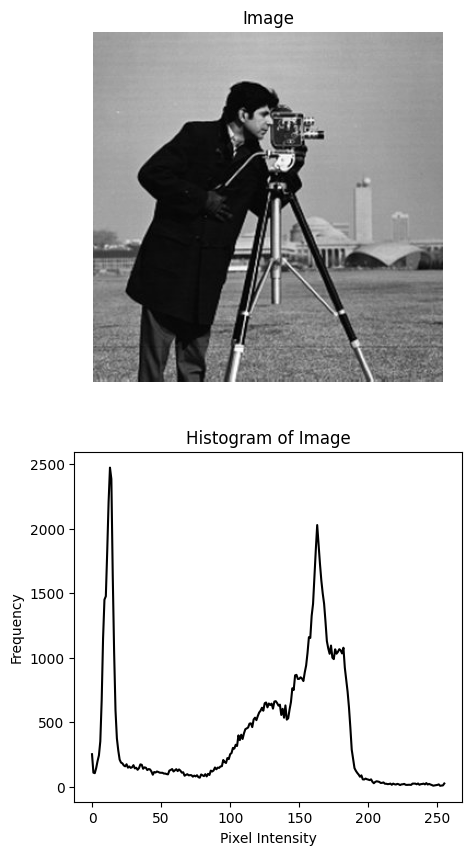

In [ ]:
# Load the image
image = plt.imread('image.jpg')

# Convert the image to grayscale if it's a color image
if len(image.shape) == 3:
    image = np.mean(image, axis=2).astype(np.uint8)

# Calculate histogram
hist = histogram(image.flatten(), bins=256, Range=[0,256])

plt.figure(figsize=(5, 10))

plt.subplot(2, 1, 1)
plt.imshow(image,cmap='gray')
plt.title('Image')
plt.axis('off')


# Plot histogram
plt.subplot(2, 1, 2)
plt.plot(hist, color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Image')
plt.show()


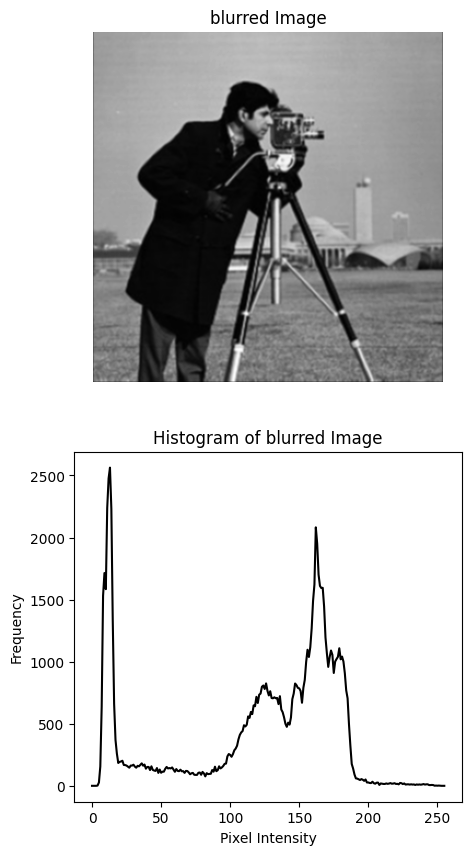

In [ ]:
def gaussian_blur(image):
    kernel=np.array([[1,2,1],
                     [2,4,2],
                     [1,2,1]])
    kernel=kernel / np.sum(kernel)
    blurred_image = convolve(image, kernel)
    return blurred_image


def convolve(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    padded_image = np.pad(image, pad_width=1, mode='constant')
    result = np.zeros_like(image)

    for i in range(image_height):
        for j in range(image_width):
            result[i, j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return result




# Apply Gaussian blur
blurred_image = gaussian_blur(image)

# Calculate histogram
blurhist = histogram(blurred_image.flatten(), 256, [0,256])

plt.figure(figsize=(5, 10))

plt.subplot(2, 1, 1)
plt.imshow(blurred_image,cmap='gray')
plt.title('blurred Image')
plt.axis('off')


# Plot histogram
plt.subplot(2, 1, 2)
plt.plot(blurhist, color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of blurred Image')
plt.show()


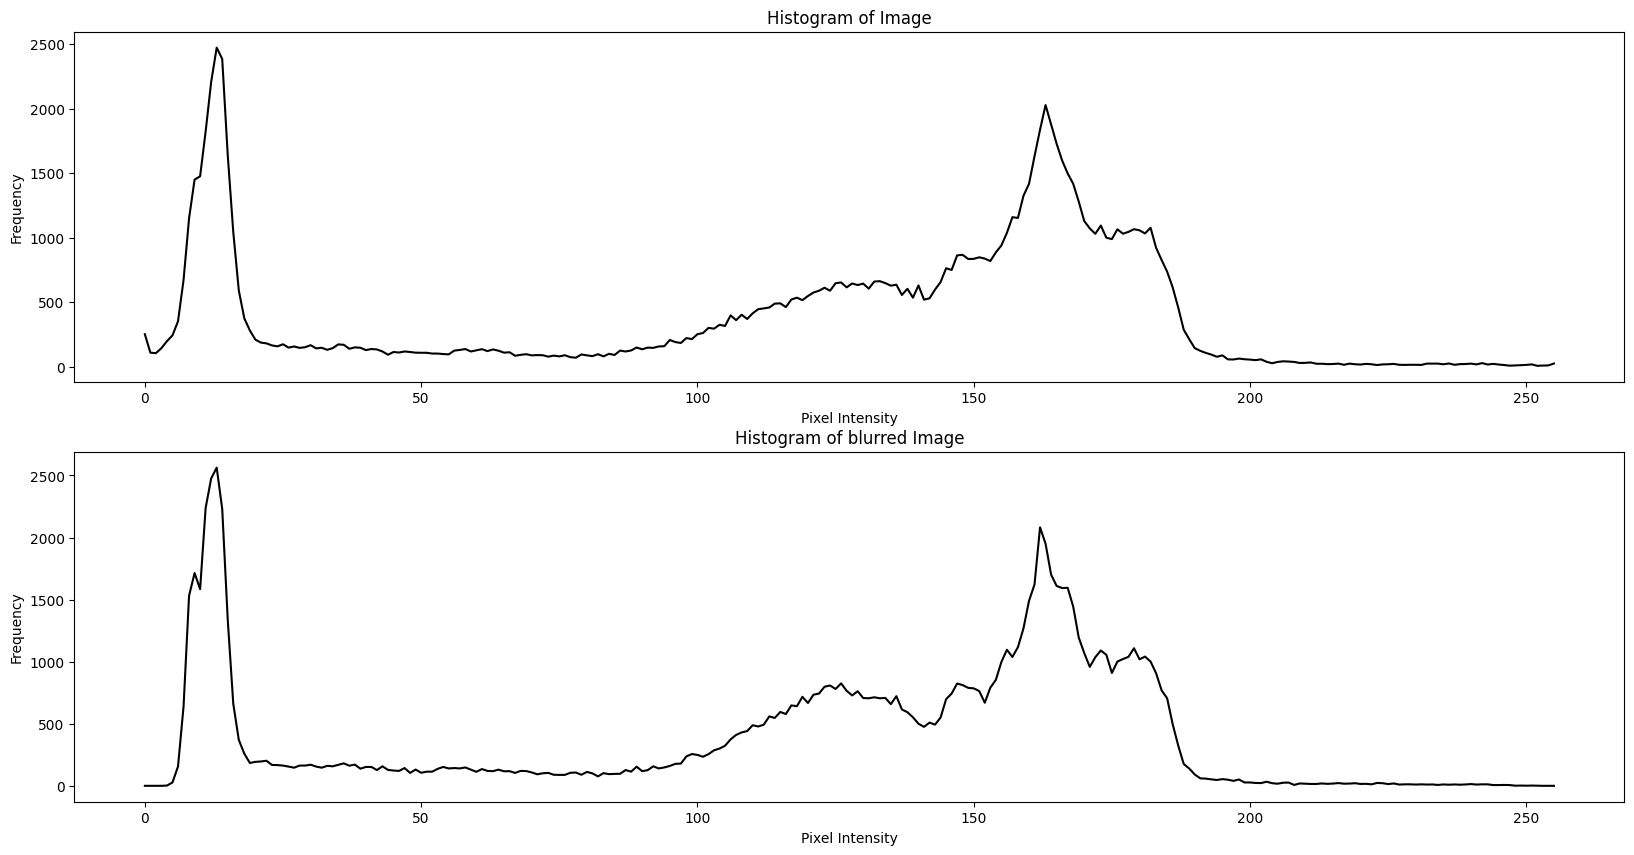

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
plt.plot(hist, color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Image')


plt.subplot(2, 1, 2)
plt.plot(blurhist, color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of blurred Image')
plt.show()



In [ ]:
def otsu(image):
    # Compute the histogram
    hist = histogram(image.flatten(), 256, [0, 256])
    hist[0]=1
    # Normalize the histogram
    hist = hist / float(np.sum(hist))

    # Compute the cumulative sum of the normalized histogram
    cumulative_sum = cumsum(hist)

    # Compute the cumulative mean of the intensity values
    cumulative_mean = cumsum(np.arange(256) * hist)

    # Global intensity mean
    global_mean = cumulative_mean[-1]

    # Compute between-class variance
    between_class_variance = (global_mean * cumulative_sum - cumulative_mean)**2 / (cumulative_sum * (1 - cumulative_sum))

    # Find the maximum between-class variance
    otsu_threshold = np.argmax(between_class_variance)

    # Apply the threshold
    otsu_image = np.where(image > otsu_threshold, 255, 0).astype(np.uint8)

    # Display the original and thresholded images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(otsu_image, cmap='gray')
    plt.title('Otsu Thresholding')
    plt.axis('off')


    plt.show()

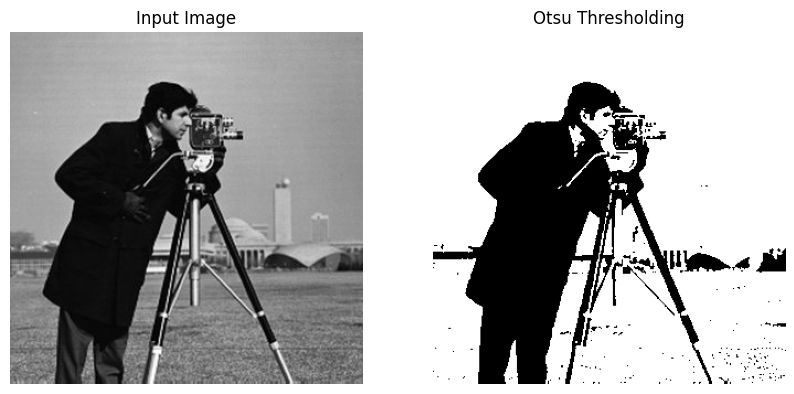

In [ ]:
otsu(image)

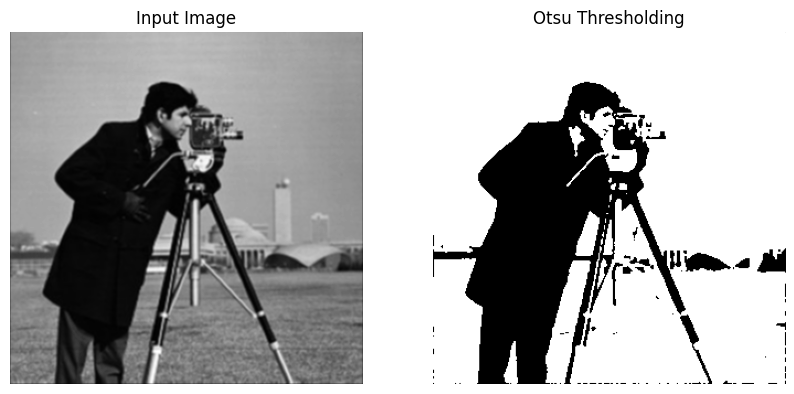

In [ ]:
otsu(blurred_image)